<a href="https://colab.research.google.com/github/qcsm/learndl/blob/master/ANN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATA/cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


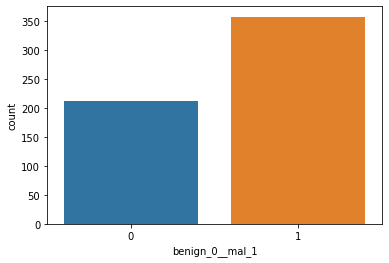

In [8]:
sns.countplot(x='benign_0__mal_1', data=df)

In [9]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [11]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

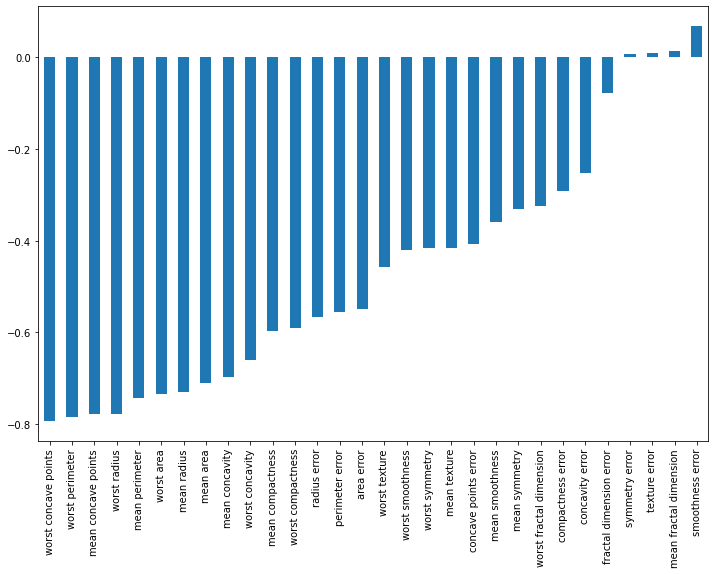

In [14]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

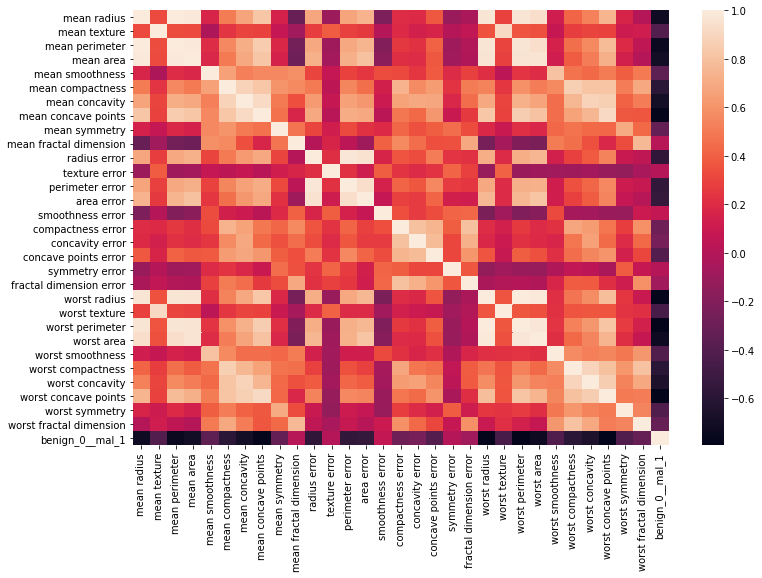

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [17]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.25, 
    random_state = 101
) 

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

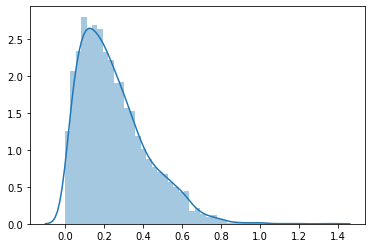

In [35]:
sns.distplot(X_test)

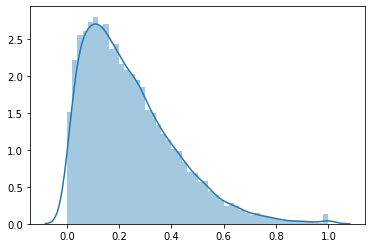

In [36]:
sns.distplot(X_train)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [38]:
X_train.shape

(426, 30)

In [41]:
model = Sequential()

model.add( Dense( 30, activation='relu' ))
model.add( Dense( 15, activation='relu' ))

# Binary Classifier
model.add( Dense( 1, activation='sigmoid' ))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
model.fit( x = X_train, y = y_train, epochs = 600, validation_data = ( X_test, y_test ) )

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6962 - val_loss: 0.6802
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6638 - val_loss: 0.6481
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6343 - val_loss: 0.6166
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6015 - val_loss: 0.5801
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5619 - val_loss: 0.5317
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5097 - val_loss: 0.4790
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4582 - val_loss: 0.4222
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4032 - val_loss: 0.3672
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3538 - val_loss: 0.3189
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3113 - val_loss: 0.2764
Epoch 11

In [43]:
losses = pd.DataFrame( model.history.history )
losses

,loss,val_loss
0,0.696195,0.680229
1,0.663776,0.648056
2,0.634265,0.616610
3,0.601511,0.580108
4,0.561900,0.531710
...,...,...
595,0.004752,0.348338
596,0.005156,0.365122
597,0.004676,0.348453
598,0.004669,0.352087


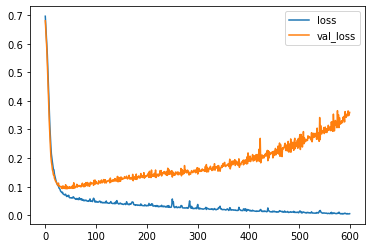

In [44]:
losses.plot()

In [57]:
model = Sequential()

model.add( Dense( 30, activation='relu' ))
model.add( Dense( 15, activation='relu' ))

# Binary Classifier
model.add( Dense( 1, activation='sigmoid' ))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping( monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25 )

In [59]:
model.fit( x = X_train, y = y_train, epochs = 600, validation_data = ( X_test, y_test ), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6941 - val_loss: 0.6811
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6730 - val_loss: 0.6621
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6500 - val_loss: 0.6364
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6191 - val_loss: 0.5990
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5790 - val_loss: 0.5562
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5346 - val_loss: 0.5075
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4819 - val_loss: 0.4511
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4275 - val_loss: 0.3958
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3758 - val_loss: 0.3463
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3319 - val_loss: 0.3043
Epoch 11/

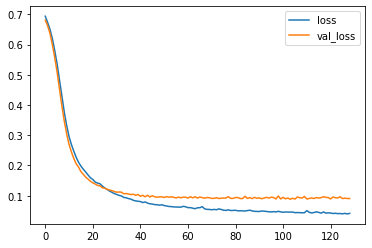

In [60]:
model_loss = pd.DataFrame( model.history.history )
model_loss.plot()

In [66]:
from tensorflow.keras.layers import Dropout

In [106]:
model = Sequential()

model.add( Dense( 30, activation='relu' ))
model.add( Dropout(0.5) )
model.add( Dense( 15, activation='relu' ))
model.add( Dropout(0.5) )

# Binary Classifier
model.add( Dense( 1, activation='sigmoid' ))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [107]:
early_stop = EarlyStopping( monitor = 'val_loss', mode = 'min', verbose = 1, patience = 15 )
model.fit( x = X_train, y = y_train, epochs = 600, validation_data = ( X_test, y_test ), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7163 - val_loss: 0.6936
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6995 - val_loss: 0.6724
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6836 - val_loss: 0.6521
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6578 - val_loss: 0.6387
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6444 - val_loss: 0.6172
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6124 - val_loss: 0.5862
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6015 - val_loss: 0.5597
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5967 - val_loss: 0.5277
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5576 - val_loss: 0.4902
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5252 - val_loss: 0.4528
Epoch 11/

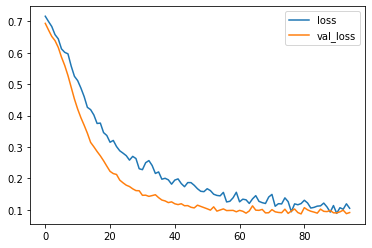

In [108]:
model_loss = pd.DataFrame( model.history.history )
model_loss.plot()

In [109]:
predictions = model.predict_classes(X_test)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

print( classification_report( y_test, predictions ) )

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [111]:
print( confusion_matrix( y_test, predictions ) )

[[54  1]
 [ 2 86]]
